In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import pickle
import import_ipynb
import sys
sys.path.append('./../')
import Portfolio_value as pv

In [2]:
df =  pd.read_csv('./../data/data.csv')

In [3]:
def get_metric2(retire_year, k, upper_year, withrate, df, init_wealth, p_val, w_val, decile, period):
    # bequest
    p_amounts = p_val['year{}_k{}_decile{}_period{}'.format(upper_year, k, decile, period)][retire_year]
    bequest = p_amounts[12*upper_year]*init_wealth*(1-withrate)/100
    
    # withdraw_amount
    w_amounts = w_val['year{}_k{}_decile{}_period{}'.format(upper_year, k, decile, period)][retire_year]
    withdraw_amount = sum(w_amounts)
    
    # depletion time
    if np.argwhere(p_amounts == 0).size > 0 : # 고갈이 되면
        dep_time = np.argwhere(p_amounts == 0)[0][0]
    elif np.argwhere(p_amounts == 0).size == 0: # 고갈이 안되면
        dep_time = upper_year*12
        
    # max decline
    dec = np.min(p_amounts)/p_amounts[0]
    dec = dec - 1
    
    # underwater duration
    start_date = datetime(retire_year, 1, 1)
    end_date = start_date + relativedelta(years=upper_year)
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    under_count = 0
    for i in range(upper_year*12):
        if p_amounts[i]*df.iloc[i]['CPI'] < p_amounts[0]*df.iloc[0]['CPI'] :
             under_count+= 1
        
    return bequest/1000, withdraw_amount/1000, dep_time, dec * 100, under_count

In [4]:
init_wealth = np.array([1.63965472e+08, 2.70248416e+08, 3.82921690e+08, 5.36130637e+08, 1.06264929e+09]) / 1300
k = 0.5
withdraw_rate_normal = np.array([[0.16760578, 0.09163658, 0.05710473, 0.03629272, 0.0183105 ],
                                 [0.16035815, 0.08557416, 0.05157263, 0.03159752, 0.01594167],
                                 [0.15311053, 0.07951218, 0.04604085, 0.0269021 , 0.01357272]])

withdraw_rate_minimum = np.array([[0.1078127 , 0.05535884, 0.03150158, 0.01800613, 0.0090845 ],
                                  [0.10056508, 0.04929642, 0.02596949, 0.01331093, 0.00671567],
                                  [0.09331745, 0.04323444, 0.0204377 , 0.00861551, 0.00434672]])

# Normal_recent

In [5]:
p_val_normal = np.load('./../result/late_retire/p_val/p_val_const_normal_spending.npy', allow_pickle=True)
w_val_normal = np.load('./../result/late_retire/w_val/w_val_const_normal_spending.npy', allow_pickle=True)

p_val_normal = p_val_normal.reshape(1)
p_val_normal = p_val_normal[0]

w_val_normal = w_val_normal.reshape(1)
w_val_normal = w_val_normal[0]

In [6]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [7]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [8]:
upper_years = [10,15,20, 25, 30]
periods = [30, 35, 40]

In [9]:
bear_perform_1_normal_recent = {}
bear_perform_2_normal_recent = {}
bear_perform_3_normal_recent = {}
bear_perform_4_normal_recent = {}
bear_perform_5_normal_recent = {}
for upper_year in upper_years[2:5]:
    bear_perform_1_normal_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_normal_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_normal_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_normal_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_normal_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [10]:
for upper_year in upper_years[2:5]:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_normal[0], df, init_wealth[decile-1], p_val_normal, w_val_normal, decile, 30)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_normal_recent[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_normal_recent[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_normal_recent[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_normal_recent[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_normal_recent[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_normal_recent[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_normal_recent[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_normal_recent[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_normal_recent[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_normal_recent[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_normal_recent[upper_year]['inc'].append(res[1])
                    bear_perform_1_normal_recent[upper_year]['beq'].append(res[0])
                    bear_perform_1_normal_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_normal_recent[upper_year]['inc'].append(res[1])
                    bear_perform_2_normal_recent[upper_year]['beq'].append(res[0])
                    bear_perform_2_normal_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_normal_recent[upper_year]['inc'].append(res[1])
                    bear_perform_3_normal_recent[upper_year]['beq'].append(res[0])
                    bear_perform_3_normal_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_normal_recent[upper_year]['inc'].append(res[1])
                    bear_perform_4_normal_recent[upper_year]['beq'].append(res[0])
                    bear_perform_4_normal_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_normal_recent[upper_year]['inc'].append(res[1])
                    bear_perform_5_normal_recent[upper_year]['beq'].append(res[0])
                    bear_perform_5_normal_recent[upper_year]['total'].append(res[1] + res[0])

In [11]:
# Define all dictionaries and indices we want to calculate mean for
dicts_normal_recent = [bear_perform_1_normal_recent, bear_perform_2_normal_recent, bear_perform_3_normal_recent, bear_perform_4_normal_recent, bear_perform_5_normal_recent]#[normal_perform, bear_perform, full_perform]
indices = upper_years[2:5]

# Use list comprehension to compute all means at once
# Store results in lists
a_normal_recent = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_normal_recent]
d_normal_recent = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_normal_recent]
e_normal_recent = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_normal_recent]
f_normal_recent = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_normal_recent]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [12]:
a_normal_recent

[100.0,
 100.0,
 73.3,
 13.3,
 0.0,
 100.0,
 100.0,
 100.0,
 50.0,
 0.0,
 100.0,
 100.0,
 100.0,
 100.0,
 0.0]

In [13]:
d_normal_recent

[125.0,
 194.6,
 257.1,
 272.5,
 272.5,
 119.6,
 178.6,
 235.2,
 314.6,
 332.5,
 127.6,
 185.6,
 229.4,
 310.8,
 389.6]

In [14]:
e_normal_recent

[0.0,
 0.0,
 11.0,
 102.9,
 475.5,
 0.0,
 0.0,
 0.0,
 10.6,
 320.8,
 0.0,
 0.0,
 0.0,
 0.0,
 236.2]

# Minimum_recent

In [15]:
p_val_minimum = np.load('./../result/late_retire/p_val/p_val_const_minimum_spending.npy', allow_pickle=True)
w_val_minimum = np.load('./../result/late_retire/w_val/w_val_const_minimum_spending.npy', allow_pickle=True)

p_val_minimum = p_val_minimum.reshape(1)
p_val_minimum = p_val_minimum[0]

w_val_minimum = w_val_minimum.reshape(1)
w_val_minimum = w_val_minimum[0]

In [16]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [17]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [18]:
upper_years = [10,15,20, 25, 30]
periods = [30, 35, 40]

In [19]:
bear_perform_1_minimum_recent = {}
bear_perform_2_minimum_recent = {}
bear_perform_3_minimum_recent = {}
bear_perform_4_minimum_recent = {}
bear_perform_5_minimum_recent = {}

for upper_year in upper_years[2:5]:
    bear_perform_1_minimum_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_minimum_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_minimum_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_minimum_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_minimum_recent[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [20]:
for upper_year in upper_years[2:5]:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_minimum[0], df, init_wealth[decile-1], p_val_minimum, w_val_minimum, decile, 30)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_minimum_recent[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_minimum_recent[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_minimum_recent[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_minimum_recent[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_minimum_recent[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_minimum_recent[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_minimum_recent[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_minimum_recent[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_minimum_recent[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_minimum_recent[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_minimum_recent[upper_year]['inc'].append(res[1])
                    bear_perform_1_minimum_recent[upper_year]['beq'].append(res[0])
                    bear_perform_1_minimum_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_minimum_recent[upper_year]['inc'].append(res[1])
                    bear_perform_2_minimum_recent[upper_year]['beq'].append(res[0])
                    bear_perform_2_minimum_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_minimum_recent[upper_year]['inc'].append(res[1])
                    bear_perform_3_minimum_recent[upper_year]['beq'].append(res[0])
                    bear_perform_3_minimum_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_minimum_recent[upper_year]['inc'].append(res[1])
                    bear_perform_4_minimum_recent[upper_year]['beq'].append(res[0])
                    bear_perform_4_minimum_recent[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_minimum_recent[upper_year]['inc'].append(res[1])
                    bear_perform_5_minimum_recent[upper_year]['beq'].append(res[0])
                    bear_perform_5_minimum_recent[upper_year]['total'].append(res[1] + res[0])

In [21]:
# Define all dictionaries and indices we want to calculate mean for
dicts_minimum_recent = [bear_perform_1_minimum_recent, bear_perform_2_minimum_recent, bear_perform_3_minimum_recent, bear_perform_4_minimum_recent, bear_perform_5_minimum_recent]#[normal_perform, bear_perform, full_perform]
indices = upper_years[2:5]

# Use list comprehension to compute all means at once
# Store results in lists
a_minimum_recent = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_minimum_recent]
d_minimum_recent = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_minimum_recent]
e_minimum_recent = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_minimum_recent]
f_minimum_recent = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_minimum_recent]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [22]:
a_minimum_recent

[100.0,
 73.3,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 20.0,
 0.0,
 0.0,
 100.0,
 100.0,
 60.0,
 0.0,
 0.0]

In [23]:
d_minimum_recent

[120.8,
 179.2,
 169.0,
 135.2,
 135.2,
 111.3,
 164.9,
 204.7,
 165.0,
 165.0,
 115.1,
 161.0,
 221.7,
 193.3,
 193.3]

In [24]:
f_minimum_recent

[120.8,
 189.2,
 272.0,
 385.2,
 766.2,
 111.3,
 164.9,
 235.4,
 335.0,
 668.8,
 115.1,
 161.0,
 224.8,
 319.8,
 641.9]

In [25]:
e_minimum_recent

[0.0,
 10.1,
 103.0,
 250.0,
 631.0,
 0.0,
 0.0,
 30.7,
 170.0,
 503.9,
 0.0,
 0.0,
 3.2,
 126.5,
 448.6]

# Normal_5years

In [26]:
p_val_normal = np.load('./../result/late_retire/p_val/p_val_const_normal_spending.npy', allow_pickle=True)
w_val_normal = np.load('./../result/late_retire/w_val/w_val_const_normal_spending.npy', allow_pickle=True)

p_val_normal = p_val_normal.reshape(1)
p_val_normal = p_val_normal[0]

w_val_normal = w_val_normal.reshape(1)
w_val_normal = w_val_normal[0]

In [27]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [28]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [29]:
upper_years = [10,15,20, 25, 30]
periods = [30, 35, 40]

In [30]:
bear_perform_1_normal_5years = {}
bear_perform_2_normal_5years = {}
bear_perform_3_normal_5years = {}
bear_perform_4_normal_5years = {}
bear_perform_5_normal_5years = {}
for upper_year in upper_years[1:4]:
    bear_perform_1_normal_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_normal_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_normal_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_normal_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_normal_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [31]:
for upper_year in upper_years[1:4]:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_normal[1], df, init_wealth[decile-1], p_val_normal, w_val_normal, decile, 35)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_normal_5years[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_normal_5years[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_normal_5years[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_normal_5years[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_normal_5years[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_normal_5years[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_normal_5years[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_normal_5years[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_normal_5years[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_normal_5years[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_normal_5years[upper_year]['inc'].append(res[1])
                    bear_perform_1_normal_5years[upper_year]['beq'].append(res[0])
                    bear_perform_1_normal_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_normal_5years[upper_year]['inc'].append(res[1])
                    bear_perform_2_normal_5years[upper_year]['beq'].append(res[0])
                    bear_perform_2_normal_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_normal_5years[upper_year]['inc'].append(res[1])
                    bear_perform_3_normal_5years[upper_year]['beq'].append(res[0])
                    bear_perform_3_normal_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_normal_5years[upper_year]['inc'].append(res[1])
                    bear_perform_4_normal_5years[upper_year]['beq'].append(res[0])
                    bear_perform_4_normal_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_normal_5years[upper_year]['inc'].append(res[1])
                    bear_perform_5_normal_5years[upper_year]['beq'].append(res[0])
                    bear_perform_5_normal_5years[upper_year]['total'].append(res[1] + res[0])

In [32]:
# Define all dictionaries and indices we want to calculate mean for
dicts_normal_5years = [bear_perform_1_normal_5years, bear_perform_2_normal_5years, bear_perform_3_normal_5years, bear_perform_4_normal_5years, bear_perform_5_normal_5years]#[normal_perform, bear_perform, full_perform]
indices = upper_years[1:4]

# Use list comprehension to compute all means at once
# Store results in lists
a_normal_5years = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_normal_5years]
d_normal_5years = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_normal_5years]
e_normal_5years = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_normal_5years]
f_normal_5years = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_normal_5years]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [33]:
a_normal_5years

[100.0,
 94.1,
 11.8,
 0.0,
 0.0,
 100.0,
 100.0,
 73.3,
 0.0,
 0.0,
 100.0,
 100.0,
 100.0,
 20.0,
 0.0]

In [34]:
d_normal_5years

[128.4,
 197.1,
 211.0,
 182.4,
 182.4,
 124.7,
 192.3,
 248.5,
 237.3,
 237.3,
 120.2,
 173.3,
 234.5,
 287.5,
 289.5]

In [35]:
e_normal_5years

[0.0,
 1.9,
 62.0,
 199.5,
 568.0,
 0.0,
 0.0,
 20.0,
 139.8,
 513.5,
 0.0,
 0.0,
 0.0,
 41.2,
 366.1]

# Minimum_5years

In [36]:
p_val_minimum = np.load('./../result/late_retire/p_val/p_val_const_minimum_spending.npy', allow_pickle=True)
w_val_minimum = np.load('./../result/late_retire/w_val/w_val_const_minimum_spending.npy', allow_pickle=True)

p_val_minimum = p_val_minimum.reshape(1)
p_val_minimum = p_val_minimum[0]

w_val_minimum = w_val_minimum.reshape(1)
w_val_minimum = w_val_minimum[0]

In [37]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [38]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [39]:
upper_years = [10,15,20, 25, 30]
periods = [30, 35, 40]

In [40]:
bear_perform_1_minimum_5years = {}
bear_perform_2_minimum_5years = {}
bear_perform_3_minimum_5years = {}
bear_perform_4_minimum_5years = {}
bear_perform_5_minimum_5years = {}

for upper_year in upper_years[1:4]:
    bear_perform_1_minimum_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_minimum_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_minimum_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_minimum_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_minimum_5years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [41]:
for upper_year in upper_years[1:4]:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_minimum[1], df, init_wealth[decile-1], p_val_minimum, w_val_minimum, decile, 35)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_minimum_5years[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_minimum_5years[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_minimum_5years[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_minimum_5years[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_minimum_5years[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_minimum_5years[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_minimum_5years[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_minimum_5years[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_minimum_5years[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_minimum_5years[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_minimum_5years[upper_year]['inc'].append(res[1])
                    bear_perform_1_minimum_5years[upper_year]['beq'].append(res[0])
                    bear_perform_1_minimum_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_minimum_5years[upper_year]['inc'].append(res[1])
                    bear_perform_2_minimum_5years[upper_year]['beq'].append(res[0])
                    bear_perform_2_minimum_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_minimum_5years[upper_year]['inc'].append(res[1])
                    bear_perform_3_minimum_5years[upper_year]['beq'].append(res[0])
                    bear_perform_3_minimum_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_minimum_5years[upper_year]['inc'].append(res[1])
                    bear_perform_4_minimum_5years[upper_year]['beq'].append(res[0])
                    bear_perform_4_minimum_5years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_minimum_5years[upper_year]['inc'].append(res[1])
                    bear_perform_5_minimum_5years[upper_year]['beq'].append(res[0])
                    bear_perform_5_minimum_5years[upper_year]['total'].append(res[1] + res[0])

In [42]:
# Define all dictionaries and indices we want to calculate mean for
dicts_minimum_5years = [bear_perform_1_minimum_5years, bear_perform_2_minimum_5years, bear_perform_3_minimum_5years, bear_perform_4_minimum_5years, bear_perform_5_minimum_5years]#[normal_perform, bear_perform, full_perform]
indices = upper_years[1:4]

# Use list comprehension to compute all means at once
# Store results in lists
a_minimum_5years = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_minimum_5years]
d_minimum_5years = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_minimum_5years]
e_minimum_5years = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_minimum_5years]
f_minimum_5years = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_minimum_5years]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [43]:
a_minimum_5years

[100.0,
 11.8,
 0.0,
 0.0,
 0.0,
 100.0,
 60.0,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 0.0,
 0.0,
 0.0]

In [44]:
d_minimum_5years

[124.5,
 143.4,
 107.0,
 76.8,
 76.8,
 120.4,
 172.3,
 139.3,
 100.0,
 100.0,
 109.7,
 166.0,
 170.0,
 122.0,
 122.0]

In [45]:
e_minimum_5years

[0.0,
 51.5,
 170.4,
 310.6,
 688.6,
 0.0,
 18.1,
 135.0,
 287.7,
 670.1,
 0.0,
 0.0,
 67.2,
 215.7,
 550.6]

# Normal_10years

In [46]:
p_val_normal = np.load('./../result/late_retire/p_val/p_val_const_normal_spending.npy', allow_pickle=True)
w_val_normal = np.load('./../result/late_retire/w_val/w_val_const_normal_spending.npy', allow_pickle=True)

p_val_normal = p_val_normal.reshape(1)
p_val_normal = p_val_normal[0]

w_val_normal = w_val_normal.reshape(1)
w_val_normal = w_val_normal[0]

In [47]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [48]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [49]:
upper_years = [10,15,20, 25, 30]
periods = [30, 35, 40]

In [50]:
bear_perform_1_normal_10years = {}
bear_perform_2_normal_10years = {}
bear_perform_3_normal_10years = {}
bear_perform_4_normal_10years = {}
bear_perform_5_normal_10years = {}
for upper_year in upper_years[0:3]:
    bear_perform_1_normal_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_normal_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_normal_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_normal_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_normal_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [51]:
for upper_year in upper_years[0:3]:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_normal[2], df, init_wealth[decile-1], p_val_normal, w_val_normal, decile, 40)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_normal_10years[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_normal_10years[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_normal_10years[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_normal_10years[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_normal_10years[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_normal_10years[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_normal_10years[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_normal_10years[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_normal_10years[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_normal_10years[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_normal_10years[upper_year]['inc'].append(res[1])
                    bear_perform_1_normal_10years[upper_year]['beq'].append(res[0])
                    bear_perform_1_normal_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_normal_10years[upper_year]['inc'].append(res[1])
                    bear_perform_2_normal_10years[upper_year]['beq'].append(res[0])
                    bear_perform_2_normal_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_normal_10years[upper_year]['inc'].append(res[1])
                    bear_perform_3_normal_10years[upper_year]['beq'].append(res[0])
                    bear_perform_3_normal_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_normal_10years[upper_year]['inc'].append(res[1])
                    bear_perform_4_normal_10years[upper_year]['beq'].append(res[0])
                    bear_perform_4_normal_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_normal_10years[upper_year]['inc'].append(res[1])
                    bear_perform_5_normal_10years[upper_year]['beq'].append(res[0])
                    bear_perform_5_normal_10years[upper_year]['total'].append(res[1] + res[0])

In [52]:
# Define all dictionaries and indices we want to calculate mean for
dicts_normal_10years = [bear_perform_1_normal_10years, bear_perform_2_normal_10years, bear_perform_3_normal_10years, bear_perform_4_normal_10years, bear_perform_5_normal_10years]#[normal_perform, bear_perform, full_perform]
indices = upper_years[0:3]

# Use list comprehension to compute all means at once
# Store results in lists
a_normal_10years = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_normal_10years]
d_normal_10years = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_normal_10years]
e_normal_10years = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_normal_10years]
f_normal_10years = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_normal_10years]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [53]:
a_normal_10years

[100.0,
 26.3,
 0.0,
 0.0,
 0.0,
 100.0,
 76.5,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 53.3,
 0.0,
 0.0]

In [54]:
d_normal_10years

[129.2,
 158.0,
 129.7,
 106.1,
 106.1,
 127.9,
 192.7,
 189.8,
 155.3,
 155.3,
 125.1,
 192.3,
 235.6,
 202.0,
 202.0]

In [55]:
e_normal_10years

[0.0,
 38.8,
 143.2,
 269.6,
 626.6,
 0.0,
 4.5,
 83.8,
 227.2,
 597.0,
 0.0,
 0.0,
 32.7,
 176.9,
 551.7]

# Minimum_10years

In [56]:
p_val_minimum = np.load('./../result/late_retire/p_val/p_val_const_minimum_spending.npy', allow_pickle=True)
w_val_minimum = np.load('./../result/late_retire/w_val/w_val_const_minimum_spending.npy', allow_pickle=True)

p_val_minimum = p_val_minimum.reshape(1)
p_val_minimum = p_val_minimum[0]

w_val_minimum = w_val_minimum.reshape(1)
w_val_minimum = w_val_minimum[0]

In [57]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [58]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [59]:
upper_years = [10,15,20, 25, 30]
periods = [30, 35, 40]

In [60]:
bear_perform_1_minimum_10years = {}
bear_perform_2_minimum_10years = {}
bear_perform_3_minimum_10years = {}
bear_perform_4_minimum_10years = {}
bear_perform_5_minimum_10years = {}

for upper_year in upper_years[0:3]:
    bear_perform_1_minimum_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_minimum_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_minimum_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_minimum_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_minimum_10years[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [61]:
for upper_year in upper_years[0:3]:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_minimum[2], df, init_wealth[decile-1], p_val_minimum, w_val_minimum, decile, 40)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_minimum_10years[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_minimum_10years[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_minimum_10years[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_minimum_10years[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_minimum_10years[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_minimum_10years[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_minimum_10years[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_minimum_10years[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_minimum_10years[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_minimum_10years[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_minimum_10years[upper_year]['inc'].append(res[1])
                    bear_perform_1_minimum_10years[upper_year]['beq'].append(res[0])
                    bear_perform_1_minimum_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_minimum_10years[upper_year]['inc'].append(res[1])
                    bear_perform_2_minimum_10years[upper_year]['beq'].append(res[0])
                    bear_perform_2_minimum_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_minimum_10years[upper_year]['inc'].append(res[1])
                    bear_perform_3_minimum_10years[upper_year]['beq'].append(res[0])
                    bear_perform_3_minimum_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_minimum_10years[upper_year]['inc'].append(res[1])
                    bear_perform_4_minimum_10years[upper_year]['beq'].append(res[0])
                    bear_perform_4_minimum_10years[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_minimum_10years[upper_year]['inc'].append(res[1])
                    bear_perform_5_minimum_10years[upper_year]['beq'].append(res[0])
                    bear_perform_5_minimum_10years[upper_year]['total'].append(res[1] + res[0])

In [62]:
# Define all dictionaries and indices we want to calculate mean for
dicts_minimum_10years = [bear_perform_1_minimum_10years, bear_perform_2_minimum_10years, bear_perform_3_minimum_10years, bear_perform_4_minimum_10years, bear_perform_5_minimum_10years]#[normal_perform, bear_perform, full_perform]
indices = upper_years[0:3]

# Use list comprehension to compute all means at once
# Store results in lists
a_minimum_10years = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_minimum_10years]
d_minimum_10years = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_minimum_10years]
e_minimum_10years = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_minimum_10years]
f_minimum_10years = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_minimum_10years]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [63]:
a_minimum_10years

[52.6,
 0.0,
 0.0,
 0.0,
 0.0,
 94.1,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 33.3,
 0.0,
 0.0,
 0.0]

In [64]:
d_minimum_10years

[109.7,
 85.9,
 57.6,
 34.0,
 34.0,
 122.4,
 125.8,
 84.2,
 49.7,
 49.7,
 118.8,
 159.7,
 109.6,
 64.7,
 64.7]

In [65]:
e_minimum_10years

[12.6,
 109.7,
 215.5,
 343.7,
 710.9,
 0.2,
 69.5,
 194.1,
 338.7,
 718.4,
 0.0,
 30.6,
 166.9,
 325.4,
 709.5]

# Result

In [66]:
bar_width = 0.2
x = np.arange(5)
labels = ['1st Quintile', '2nd Quintile', '3rd Quintile', '4th Quintile', '5th Quintile']

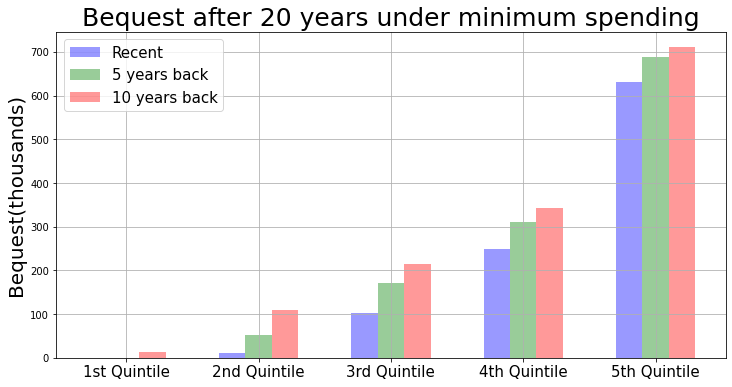

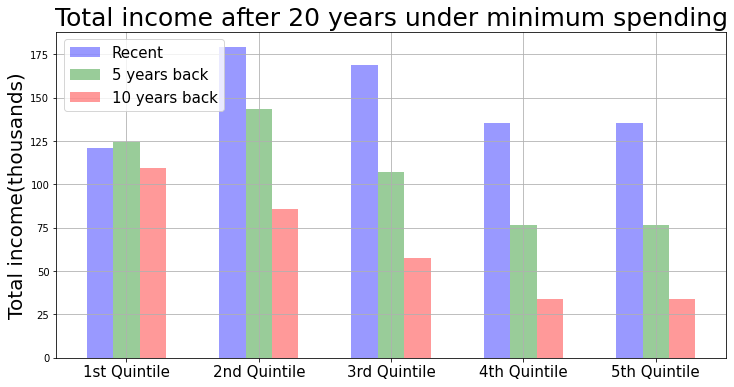

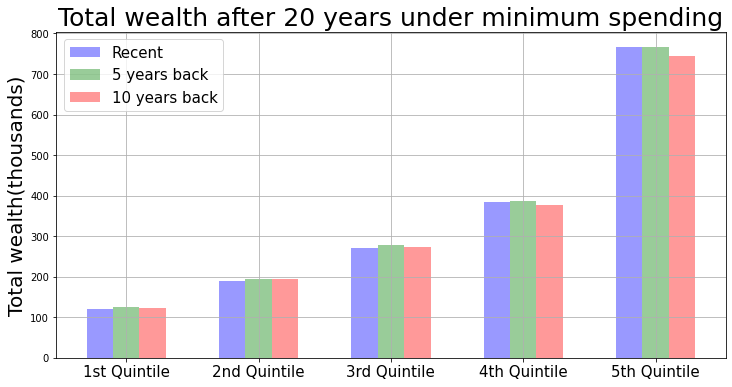

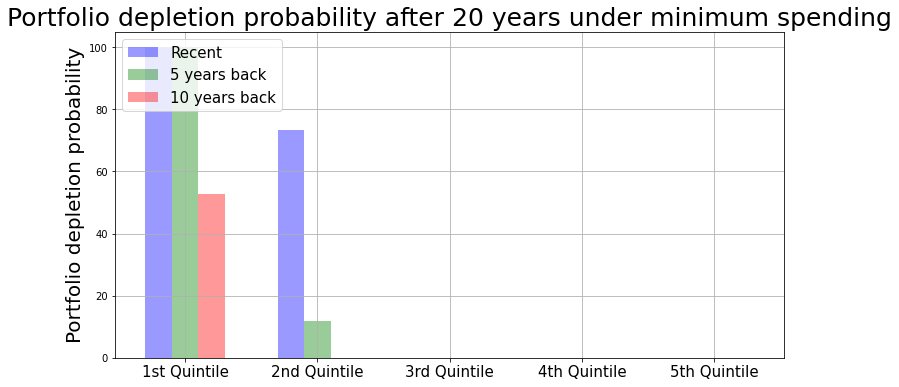

In [67]:
plt.figure(figsize=(12,6))
plt.bar(x-0.2, e_minimum_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, e_minimum_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, e_minimum_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 20 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, d_minimum_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, d_minimum_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, d_minimum_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 20 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, f_minimum_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, f_minimum_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, f_minimum_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 20 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()



plt.figure(figsize=(12,6))
plt.bar(x-0.2, a_minimum_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, a_minimum_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, a_minimum_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 20 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

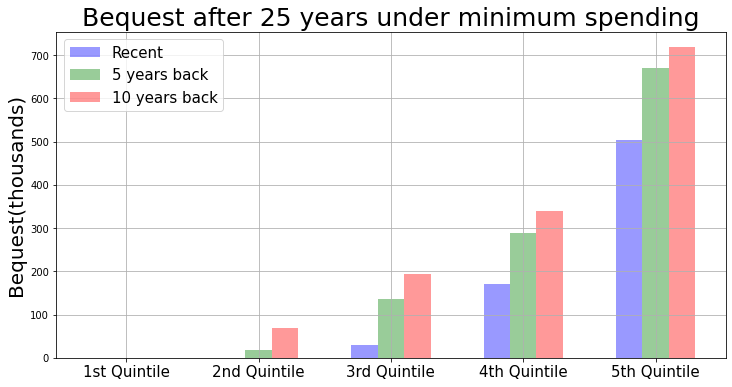

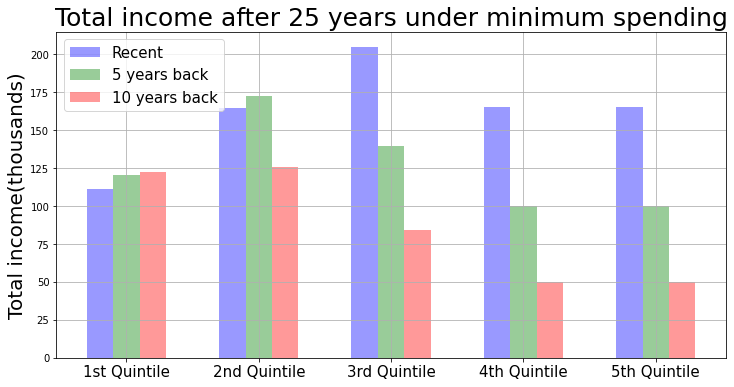

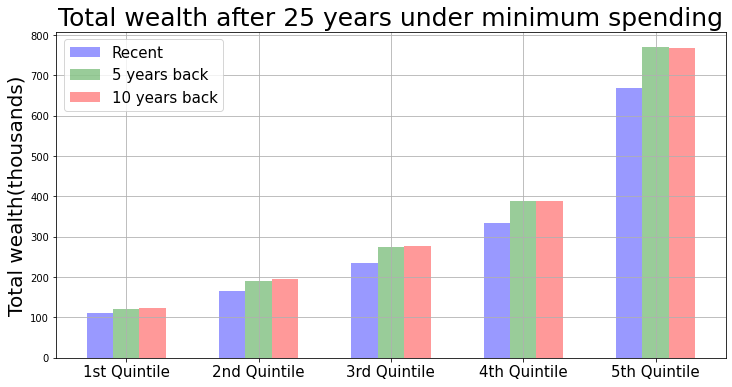

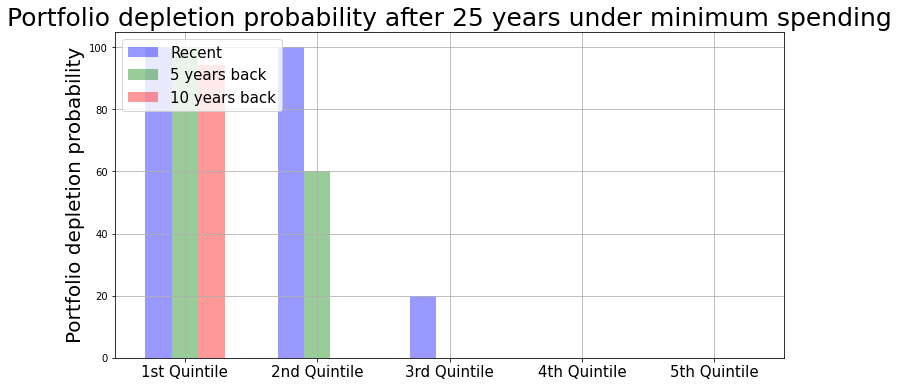

In [68]:
plt.figure(figsize=(12,6))
plt.bar(x-0.2, e_minimum_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, e_minimum_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, e_minimum_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 25 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, d_minimum_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, d_minimum_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, d_minimum_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 25 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, f_minimum_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, f_minimum_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, f_minimum_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 25 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, a_minimum_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, a_minimum_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, a_minimum_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 25 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

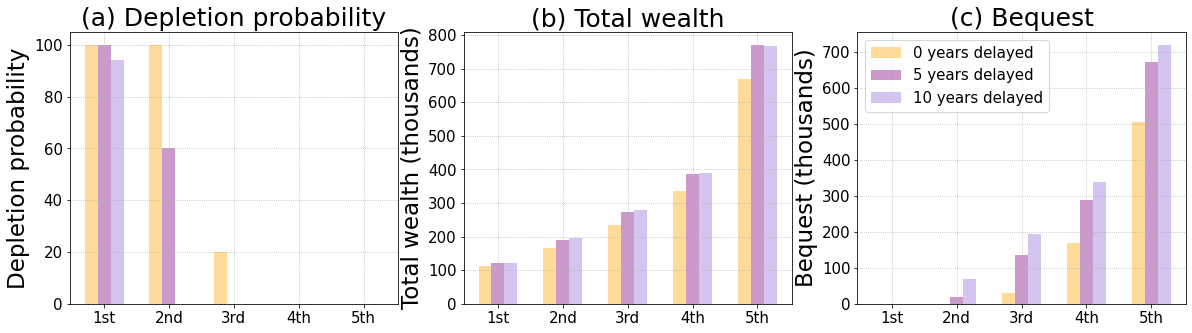

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
labels = ['1st', '2nd', '3rd', '4th', '5th']
bar_width = 0.2

# First subplot
axs[0].bar(x-0.2, a_minimum_recent[5:10], bar_width, alpha=0.4, color = '#FFA500', label = '0 years delayed')
axs[0].bar(x, a_minimum_5years[5:10], bar_width, alpha=0.4, color='#800080', label = '5 years delayed')
axs[0].bar(x+0.2, a_minimum_10years[5:10], bar_width, alpha=0.4, color='#9370DB', label = '10 years delayed')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize = 15)
axs[0].set_ylabel('Depletion probability', fontsize = 23)
axs[0].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[0].set_title('(a) Depletion probability', fontsize = 25)
axs[0].grid(visible=True, linestyle=":")

# Second subplot
axs[1].bar(x-0.2, f_minimum_recent[5:10], bar_width, alpha=0.4, color = '#FFA500', label = '0 years delayed')
axs[1].bar(x, f_minimum_5years[5:10], bar_width, alpha=0.4, color='#800080', label = '5 years delayed')
axs[1].bar(x+0.2, f_minimum_10years[5:10], bar_width, alpha=0.4, color='#9370DB', label = '10 years delayed')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize = 15)
axs[1].set_ylabel('Total wealth (thousands)', fontsize = 23)
axs[1].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[1].set_title('(b) Total wealth', fontsize = 25)
axs[1].grid(visible=True, linestyle=":")

# Third subplot
axs[2].bar(x-0.2, e_minimum_recent[5:10], bar_width, alpha=0.4, color = '#FFA500', label = '0 years delayed')
axs[2].bar(x, e_minimum_5years[5:10], bar_width, alpha=0.4, color='#800080', label = '5 years delayed')
axs[2].bar(x+0.2, e_minimum_10years[5:10], bar_width, alpha=0.4, color='#9370DB', label = '10 years delayed')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels, fontsize = 15)
axs[2].set_ylabel('Bequest (thousands)', fontsize = 23)
axs[2].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[2].legend(loc='upper left', fontsize = '15')
axs[2].set_title('(c) Bequest', fontsize = 25)
axs[2].grid(visible=True, linestyle=":")

plt.savefig('./pushing_back_minimum_25.pdf', format='pdf')
plt.show()


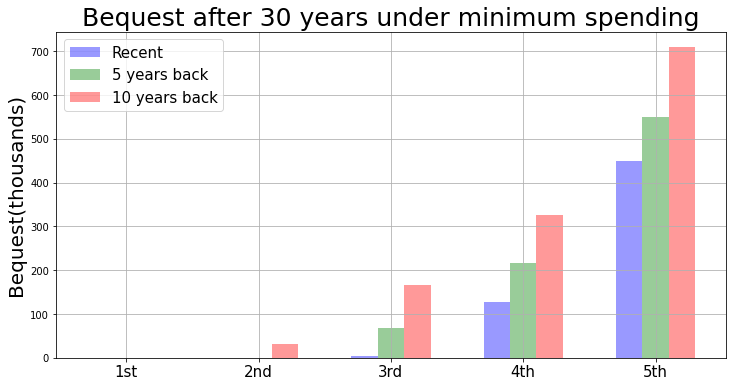

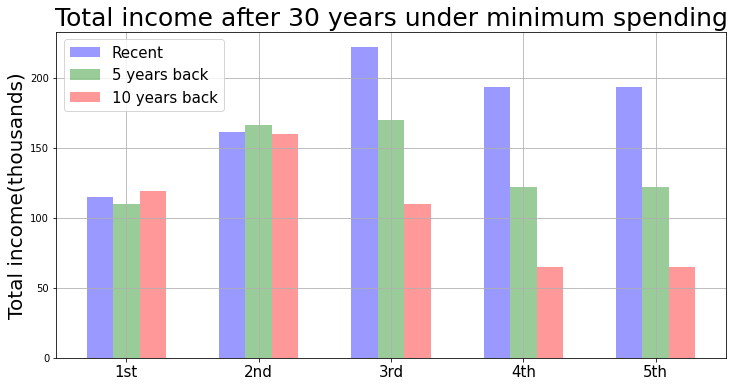

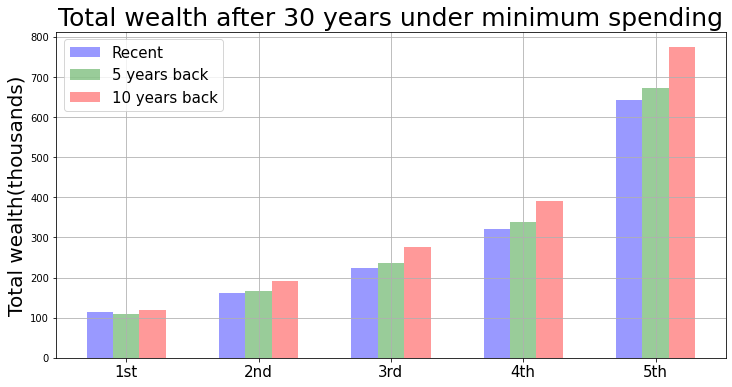

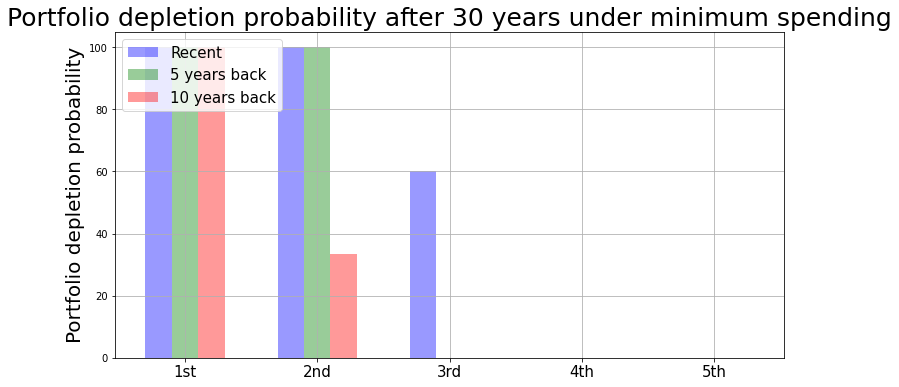

In [70]:
plt.figure(figsize=(12,6))
plt.bar(x-0.2, e_minimum_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, e_minimum_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, e_minimum_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 30 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, d_minimum_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, d_minimum_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, d_minimum_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 30 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, f_minimum_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, f_minimum_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, f_minimum_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 30 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, a_minimum_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, a_minimum_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, a_minimum_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 30 years under minimum spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

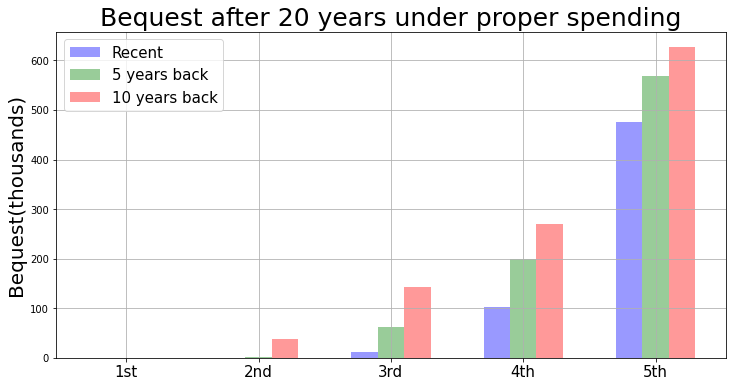

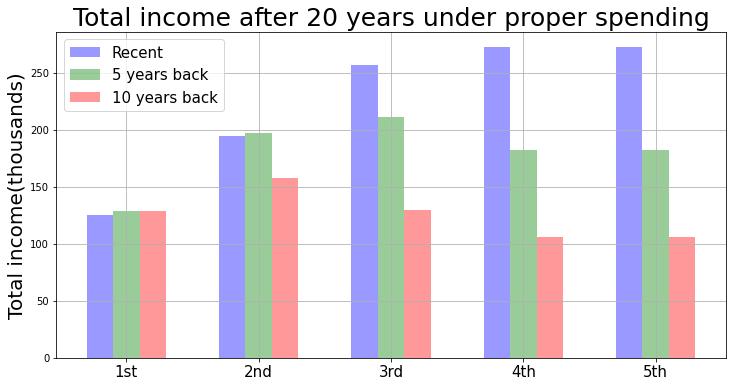

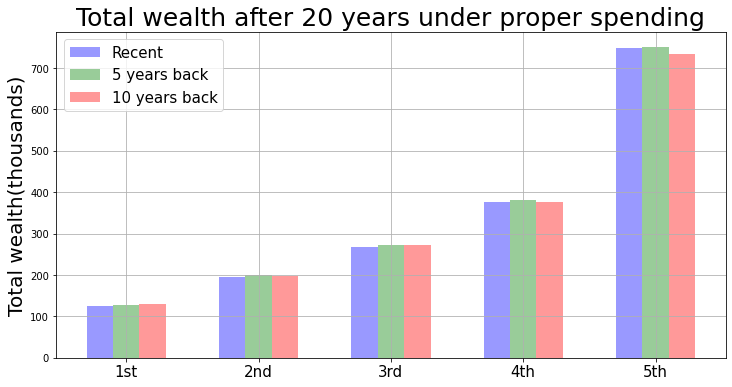

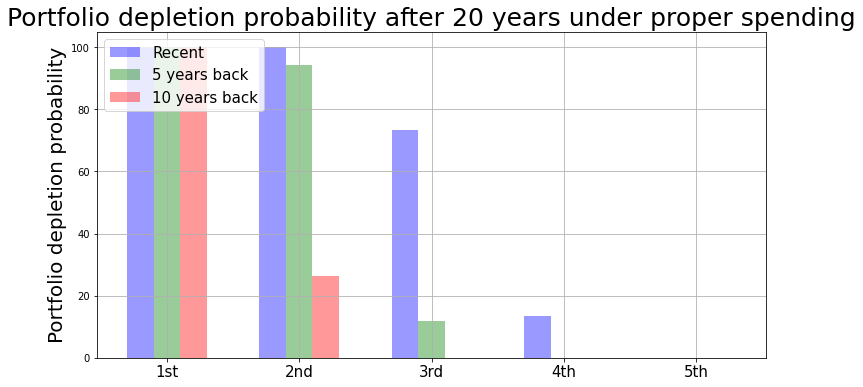

In [71]:
plt.figure(figsize=(12,6))
plt.bar(x-0.2, e_normal_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, e_normal_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, e_normal_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 20 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, d_normal_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, d_normal_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, d_normal_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 20 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, f_normal_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, f_normal_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, f_normal_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 20 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, a_normal_recent[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, a_normal_5years[0:5], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, a_normal_10years[0:5], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 20 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

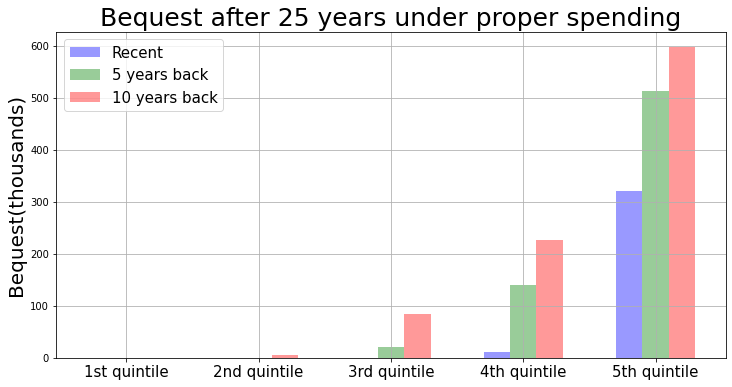

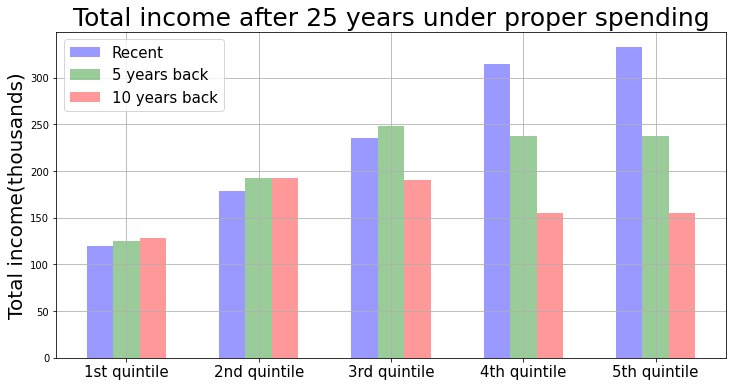

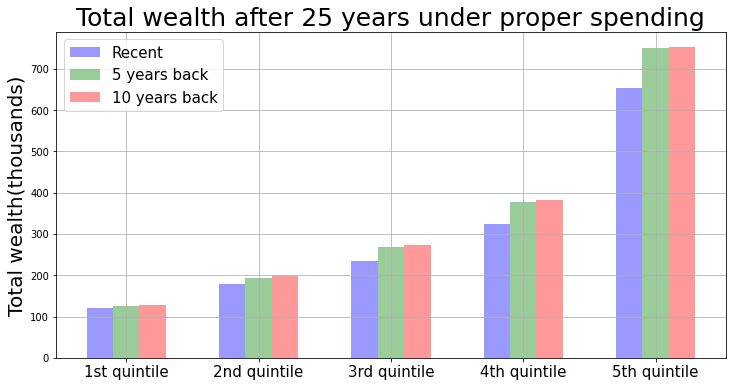

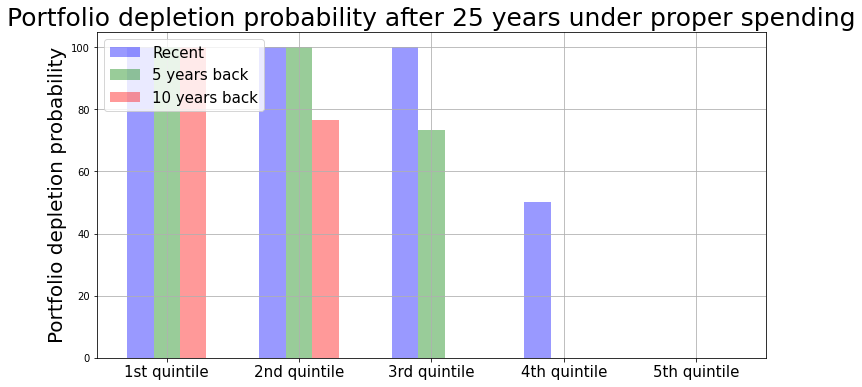

In [72]:
bar_width = 0.2
x = np.arange(5)
labels = ['1st quintile', '2nd quintile', '3rd quintile', '4th quintile', '5th quintile']
    
plt.figure(figsize=(12,6))
plt.bar(x-0.2, e_normal_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, e_normal_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, e_normal_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 25 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, d_normal_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, d_normal_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, d_normal_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back')
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 25 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, f_normal_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, f_normal_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, f_normal_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back')
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 25 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, a_normal_recent[5:10], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, a_normal_5years[5:10], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, a_normal_10years[5:10], bar_width, alpha=0.4, color='red', label = '10 years back')
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 25 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

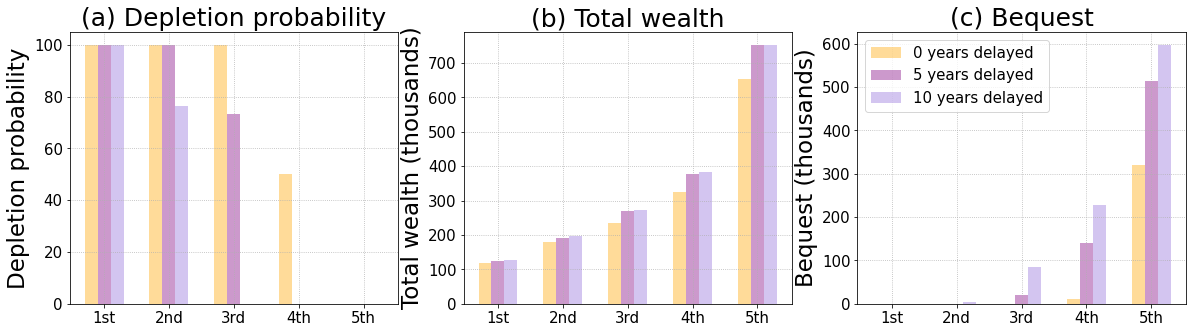

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
labels = ['1st', '2nd', '3rd', '4th', '5th']
bar_width = 0.2

# First subplot
axs[0].bar(x-0.2, a_normal_recent[5:10], bar_width, alpha=0.4, color = '#FFA500', label = '0 years delayed')
axs[0].bar(x, a_normal_5years[5:10], bar_width, alpha=0.4, color='#800080', label = '5 years delayed')
axs[0].bar(x+0.2, a_normal_10years[5:10], bar_width, alpha=0.4, color='#9370DB', label = '10 years delayed')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize = 15)
axs[0].set_ylabel('Depletion probability', fontsize = 23)
axs[0].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[0].set_title('(a) Depletion probability', fontsize = 25)
axs[0].grid(visible=True, linestyle=":")

# Second subplot
axs[1].bar(x-0.2, f_normal_recent[5:10], bar_width, alpha=0.4, color = '#FFA500', label = '0 years delayed')
axs[1].bar(x, f_normal_5years[5:10], bar_width, alpha=0.4, color='#800080', label = '5 years delayed')
axs[1].bar(x+0.2, f_normal_10years[5:10], bar_width, alpha=0.4, color='#9370DB', label = '10 years delayed')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize = 15)
axs[1].set_ylabel('Total wealth (thousands)', fontsize = 23)
axs[1].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[1].set_title('(b) Total wealth', fontsize = 25)
axs[1].grid(visible=True, linestyle=":")

# Third subplot
axs[2].bar(x-0.2, e_normal_recent[5:10], bar_width, alpha=0.4, color = '#FFA500', label = '0 years delayed')
axs[2].bar(x, e_normal_5years[5:10], bar_width, alpha=0.4, color='#800080', label = '5 years delayed')
axs[2].bar(x+0.2, e_normal_10years[5:10], bar_width, alpha=0.4, color='#9370DB', label = '10 years delayed')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels, fontsize = 15)
axs[2].set_ylabel('Bequest (thousands)', fontsize = 23)
axs[2].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[2].legend(loc='upper left', fontsize = '15')
axs[2].set_title('(c) Bequest', fontsize = 25)
axs[2].grid(visible=True, linestyle=":")

plt.savefig('./pushing_back_normal_25.pdf', format='pdf')
plt.show()


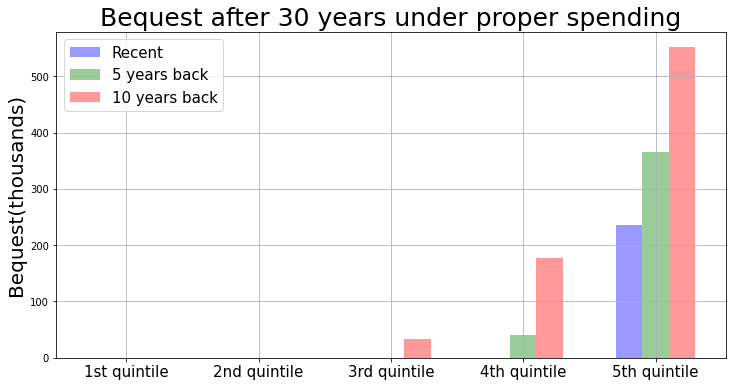

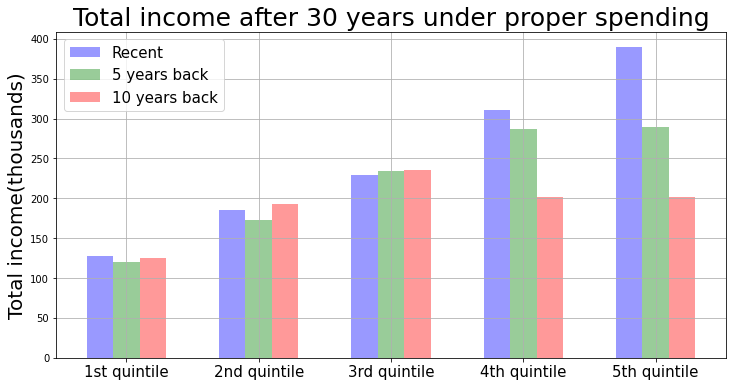

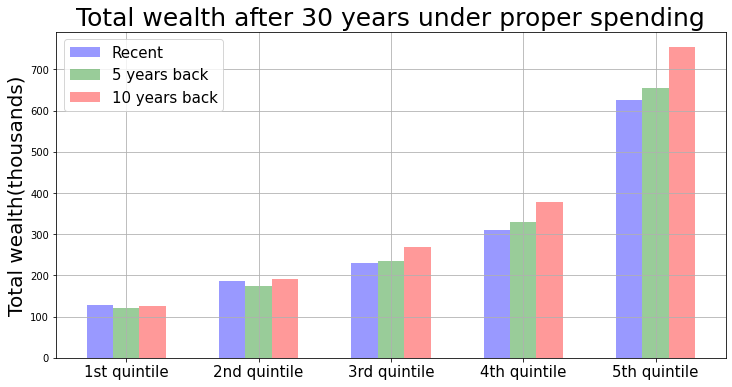

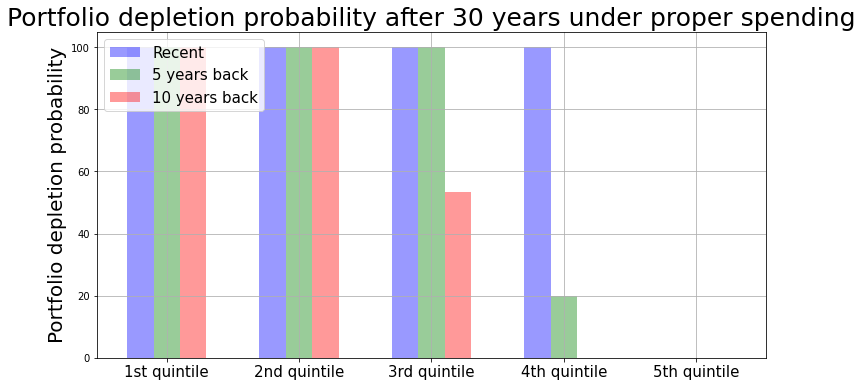

In [74]:
bar_width = 0.2
x = np.arange(5)
labels = ['1st quintile', '2nd quintile', '3rd quintile', '4th quintile', '5th quintile']
    
plt.figure(figsize=(12,6))
plt.bar(x-0.2, e_normal_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, e_normal_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, e_normal_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 30 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, d_normal_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, d_normal_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, d_normal_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back')
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 30 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, f_normal_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, f_normal_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, f_normal_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back')
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 30 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.2, a_normal_recent[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Recent')
plt.bar(x, a_normal_5years[10:15], bar_width, alpha=0.4, color='green', label = '5 years back')
plt.bar(x+0.2, a_normal_10years[10:15], bar_width, alpha=0.4, color='red', label = '10 years back')
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 30 years under proper spending', fontsize = 25)
plt.grid(visible=True)
plt.show()

In [75]:
print(a_minimum_recent[5:10], a_minimum_5years[5:10], a_minimum_10years[5:10])

[100.0, 100.0, 20.0, 0.0, 0.0] [100.0, 60.0, 0.0, 0.0, 0.0] [94.1, 0.0, 0.0, 0.0, 0.0]


In [76]:
print(f_minimum_recent[5:10], f_minimum_5years[5:10], f_minimum_10years[5:10])

[111.3, 164.9, 235.4, 335.0, 668.8] [120.4, 190.4, 274.3, 387.6, 770.1] [122.6, 195.3, 278.3, 388.4, 768.1]


In [77]:
print(e_minimum_recent[5:10], e_minimum_5years[5:10], e_minimum_10years[5:10])

[0.0, 0.0, 30.7, 170.0, 503.9] [0.0, 18.1, 135.0, 287.7, 670.1] [0.2, 69.5, 194.1, 338.7, 718.4]


In [78]:
print(a_normal_recent[5:10], a_normal_5years[5:10], a_normal_10years[5:10])

[100.0, 100.0, 100.0, 50.0, 0.0] [100.0, 100.0, 73.3, 0.0, 0.0] [100.0, 76.5, 0.0, 0.0, 0.0]


In [79]:
print(f_normal_recent[5:10], f_normal_5years[5:10], f_normal_10years[5:10])

[119.6, 178.6, 235.2, 325.2, 653.4] [124.7, 192.3, 268.5, 377.1, 750.8] [127.9, 197.2, 273.5, 382.4, 752.2]


In [80]:
print(e_normal_recent[5:10], e_normal_5years[5:10], e_normal_10years[5:10])

[0.0, 0.0, 0.0, 10.6, 320.8] [0.0, 0.0, 20.0, 139.8, 513.5] [0.0, 4.5, 83.8, 227.2, 597.0]


In [81]:
# 매트릭 참고

# https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2544651
# https://investmentsandwealth.org/getattachment/90eb6376-d090-4904-9f82-786553ff5ed9/RMJ023-OptimalWithdrawalStrategy.pdf
# https://www.betterfinancialeducation.com/sites/larryfrank.us1.advisor.ws/files/documents/apr09_frank_and_blanchett.pdf
# https://www.tandfonline.com/doi/epdf/10.2469/faj.v61.n6.2776?needAccess=true&role=button